## Classificação dos tipos de cogumelo

In [3]:
import pandas as pd
df = pd.read_csv('mushrooms.csv')
df2 = pd.read_csv('mushrooms.csv')
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#trasformar valores escritos em valores numericos
#edible=e=0, poisonous=p=1
df['class'] = df['class'].replace('e', 0)
df['class'] = df['class'].replace('p', 1)

# bell=b=0,conical=c=1,convex=x=2,flat=f=3, knobbed=k=4,sunken=s=5
df['cap-shape'] = df['cap-shape'].replace('b', 0)
df['cap-shape'] = df['cap-shape'].replace('c', 1)
df['cap-shape'] = df['cap-shape'].replace('x', 2)
df['cap-shape'] = df['cap-shape'].replace('f', 3)
df['cap-shape'] = df['cap-shape'].replace('k', 4)
df['cap-shape'] = df['cap-shape'].replace('s', 5)

# fibrous=f=0,grooves=g=1,scaly=y=2,smooth=s=3
df['cap-surface'] = df['cap-surface'].replace('f',0)
df['cap-surface'] = df['cap-surface'].replace('g',1)
df['cap-surface'] = df['cap-surface'].replace('y',2)
df['cap-surface'] = df['cap-surface'].replace('s',3)

# brown=n=0,buff=b=1,cinnamon=c=2,gray=g=3,green=r=4,pink=p=5,purple=u=6,red=e=7,white=w=8,yellow=y=9
df['cap-color'] = df['cap-color'].replace('n',0)
df['cap-color'] = df['cap-color'].replace('b',1)
df['cap-color'] = df['cap-color'].replace('c',2)
df['cap-color'] = df['cap-color'].replace('g',3)
df['cap-color'] = df['cap-color'].replace('r',4)
df['cap-color'] = df['cap-color'].replace('p',5)
df['cap-color'] = df['cap-color'].replace('u',6)
df['cap-color'] = df['cap-color'].replace('e',7)
df['cap-color'] = df['cap-color'].replace('w',8)
df['cap-color'] = df['cap-color'].replace('y',9)

#bruises=t=0, no=f=1
df['bruises'] = df['bruises'].replace('t',0)
df['bruises'] = df['bruises'].replace('f',1)

# almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
df['odor'] = df['odor'].replace('a',0)
df['odor'] = df['odor'].replace('l',1)
df['odor'] = df['odor'].replace('c',2)
df['odor'] = df['odor'].replace('y',3)
df['odor'] = df['odor'].replace('f',4)
df['odor'] = df['odor'].replace('m',5)
df['odor'] = df['odor'].replace('n',6)
df['odor'] = df['odor'].replace('p',7)
df['odor'] = df['odor'].replace('s',8)

# attached=a, descending=d, free=f, notched=n
df['gill-attachment'] = df['gill-attachment'].replace('a',0)
df['gill-attachment'] = df['gill-attachment'].replace('d',1)
df['gill-attachment'] = df['gill-attachment'].replace('f',2)
df['gill-attachment'] = df['gill-attachment'].replace('n',3)

#close=c,crowded=w,distant=d
df['gill-spacing'] = df['gill-spacing'].replace('c', 0)
df['gill-spacing'] = df['gill-spacing'].replace('w', 1)
df['gill-spacing'] = df['gill-spacing'].replace('d', 2)

#broad=b,narrow=n
df['gill-size'] = df['gill-size'].replace('b',0)
df['gill-size'] = df['gill-size'].replace('n',1)

#black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
df['gill-color'] = df['gill-color'].replace('k',0)
df['gill-color'] = df['gill-color'].replace('n',1)
df['gill-color'] = df['gill-color'].replace('b',2)
df['gill-color'] = df['gill-color'].replace('h',3)
df['gill-color'] = df['gill-color'].replace('g',4)
df['gill-color'] = df['gill-color'].replace('r',5)
df['gill-color'] = df['gill-color'].replace('o',6)
df['gill-color'] = df['gill-color'].replace('p',7)
df['gill-color'] = df['gill-color'].replace('u',8)
df['gill-color'] = df['gill-color'].replace('e',9)
df['gill-color'] = df['gill-color'].replace('w',10)
df['gill-color'] = df['gill-color'].replace('y',11)

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,2,0,1,0,...,s,w,w,p,w,o,p,k,s,u
1,0,2,3,9,0,0,2,0,0,0,...,s,w,w,p,w,o,p,n,n,g
2,0,0,3,8,0,1,2,0,0,1,...,s,w,w,p,w,o,p,n,n,m
3,1,2,2,8,0,7,2,0,1,1,...,s,w,w,p,w,o,p,k,s,u
4,0,2,3,3,1,6,2,1,0,0,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,s,o,o,p,o,o,p,b,c,l
8120,0,2,3,0,1,6,0,0,0,11,...,s,o,o,p,n,o,p,b,v,l
8121,0,3,3,0,1,6,0,0,0,1,...,s,o,o,p,o,o,p,b,c,l
8122,1,4,2,0,1,3,2,0,1,2,...,k,w,w,p,w,o,e,w,v,l


## Análise exploratória

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


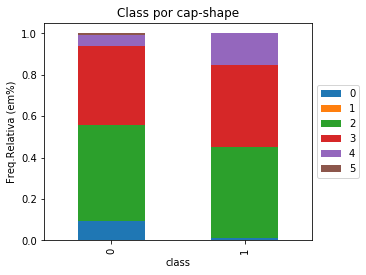

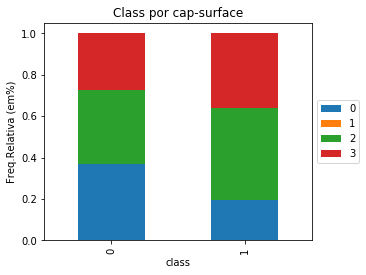

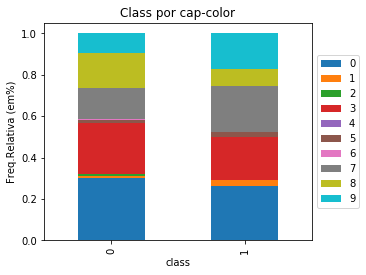

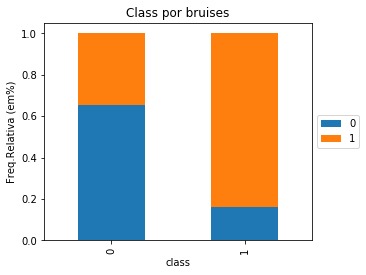

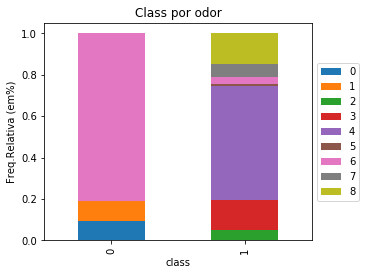

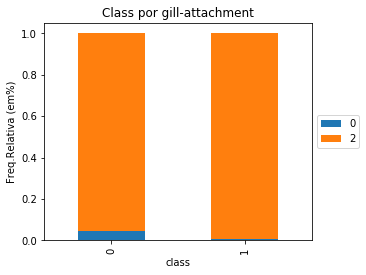

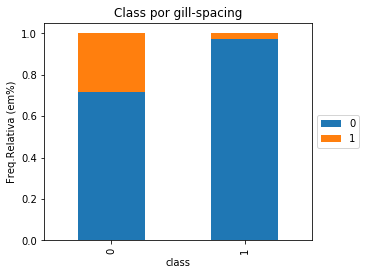

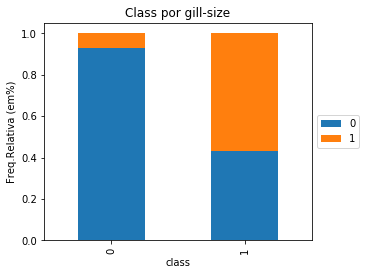

In [6]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


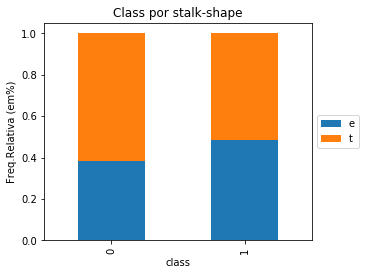

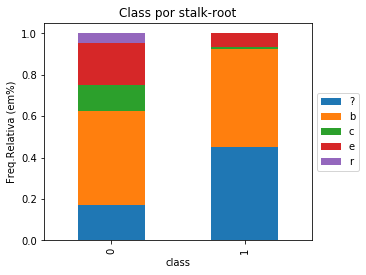

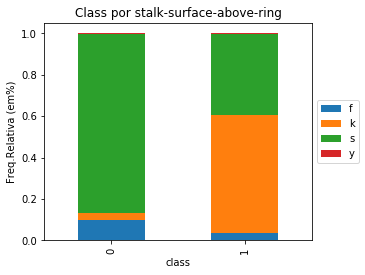

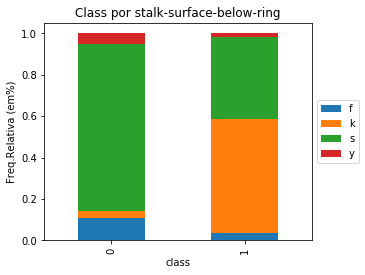

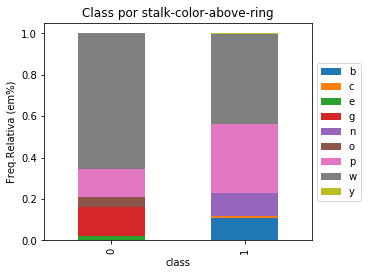

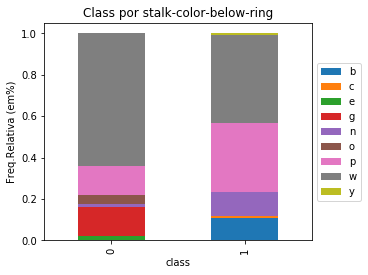

In [7]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


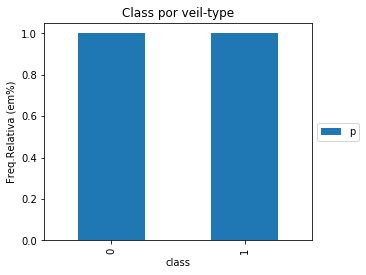

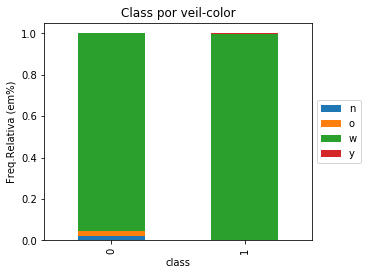

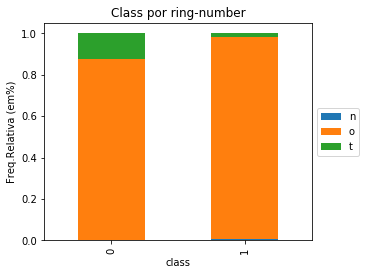

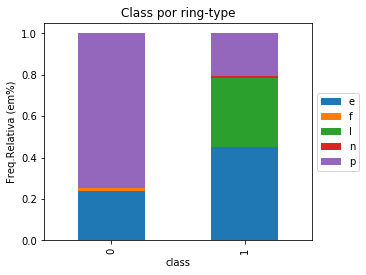

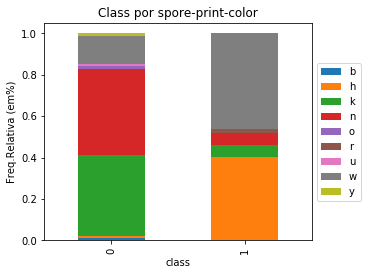

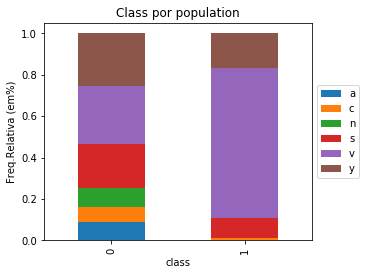

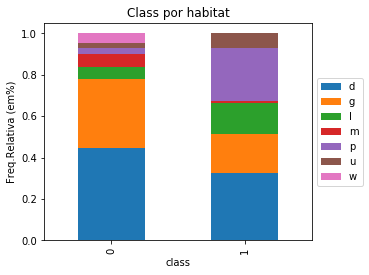

In [8]:
# Gráficos que demonstram as características dos cogumelos conforme sua classificação
# Crosstab entre a classe (comestível ou venenoso) e as colunas do dataframe 

lista = ['veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

for i in lista:
    cross = pd.crosstab(df["class"], df[i], normalize="index")
    plot = cross.plot(kind='bar', stacked=True,title=f'Class por {i}')
    plt.ylabel('Freq.Relativa (em%)')
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Análise inicial
A partir da análise dos gráficos, foi possível identificar as categorias que mais influenciam a determinação de um cogumelo como comestível ou venenoso. Dessa maneira, filtramos algumas categorias:

odor, ring-type, spore-print-color, habitat

In [9]:
ColunaPrevista = df['class']
ColunasUtilizadas = df.iloc[:,1:9]
ColunasUtilizadas

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size
0,2,3,0,0,7,2,0,1
1,2,3,9,0,0,2,0,0
2,0,3,8,0,1,2,0,0
3,2,2,8,0,7,2,0,1
4,2,3,3,1,6,2,1,0
...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0
8120,2,3,0,1,6,0,0,0
8121,3,3,0,1,6,0,0,0
8122,4,2,0,1,3,2,0,1


In [10]:
from sklearn.model_selection import train_test_split

ColunasUtilizadas_treino, ColunasUtilizadas_teste, ColunaPrevista_treino, ColunaPrevista_teste = train_test_split(ColunasUtilizadas, ColunaPrevista, test_size = 0.3)

Acuracia:0.9954881050041017, acuracia do teste: 0.9970102004924376


[Text(196.94117647058823, 203.85, 'X[27] <= 0.5\ngini = 0.499\nsamples = 8124\nvalue = [4208, 3916]'),
 Text(118.16470588235295, 176.67000000000002, 'X[53] <= 0.5\ngini = 0.288\nsamples = 4596\nvalue = [800, 3796]'),
 Text(78.7764705882353, 149.49, 'X[55] <= 0.5\ngini = 0.132\nsamples = 4048\nvalue = [288, 3760]'),
 Text(59.082352941176474, 122.31, 'X[25] <= 0.5\ngini = 0.049\nsamples = 3856\nvalue = [96, 3760]'),
 Text(39.38823529411765, 95.13, 'X[22] <= 0.5\ngini = 0.025\nsamples = 3808\nvalue = [48, 3760]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.0\nsamples = 3760\nvalue = [0, 3760]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(78.7764705882353, 95.13, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(98.47058823529412, 122.31, 'gini = 0.0\nsamples = 192\nvalue = [192, 0]'),
 Text(157.5529411764706, 149.49, 'X[71] <= 0.5\ngini = 0.123\nsamples = 548\nvalue = [512, 36]'),
 Text(137.85882352941178, 122.31, 'gini =

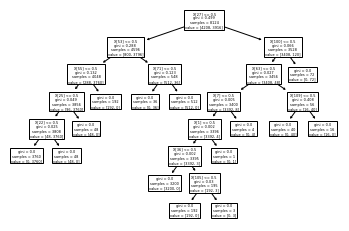

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
clf = tree.DecisionTreeClassifier(random_state = 0)
clf = clf.fit(x, df2['class'])
modelo = ExtraTreesClassifier(n_estimators = 100)
modelo.fit(ColunasUtilizadas_treino, ColunaPrevista_treino)

resultado_teste = modelo.score(ColunasUtilizadas_treino, ColunaPrevista_treino)
resultado = modelo.score(ColunasUtilizadas_teste, ColunaPrevista_teste)
print(f'Acuracia:{resultado}, acuracia do teste: {resultado_teste}')
tree.plot_tree(clf)

In [12]:
with open("tree_classifier.txt", "w") as f:
    f = tree.export_graphviz(modelo, out_file=f)

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [27]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
colunas = list(df2.columns)
colunas.remove('class')

In [29]:
cl = df2[colunas]
x = pd.get_dummies(cl)
df2['class'] = df2['class'].replace('e', 0)
df2['class'] = df2['class'].replace('p', 1)
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


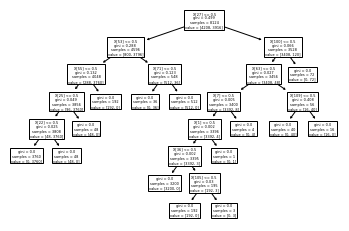

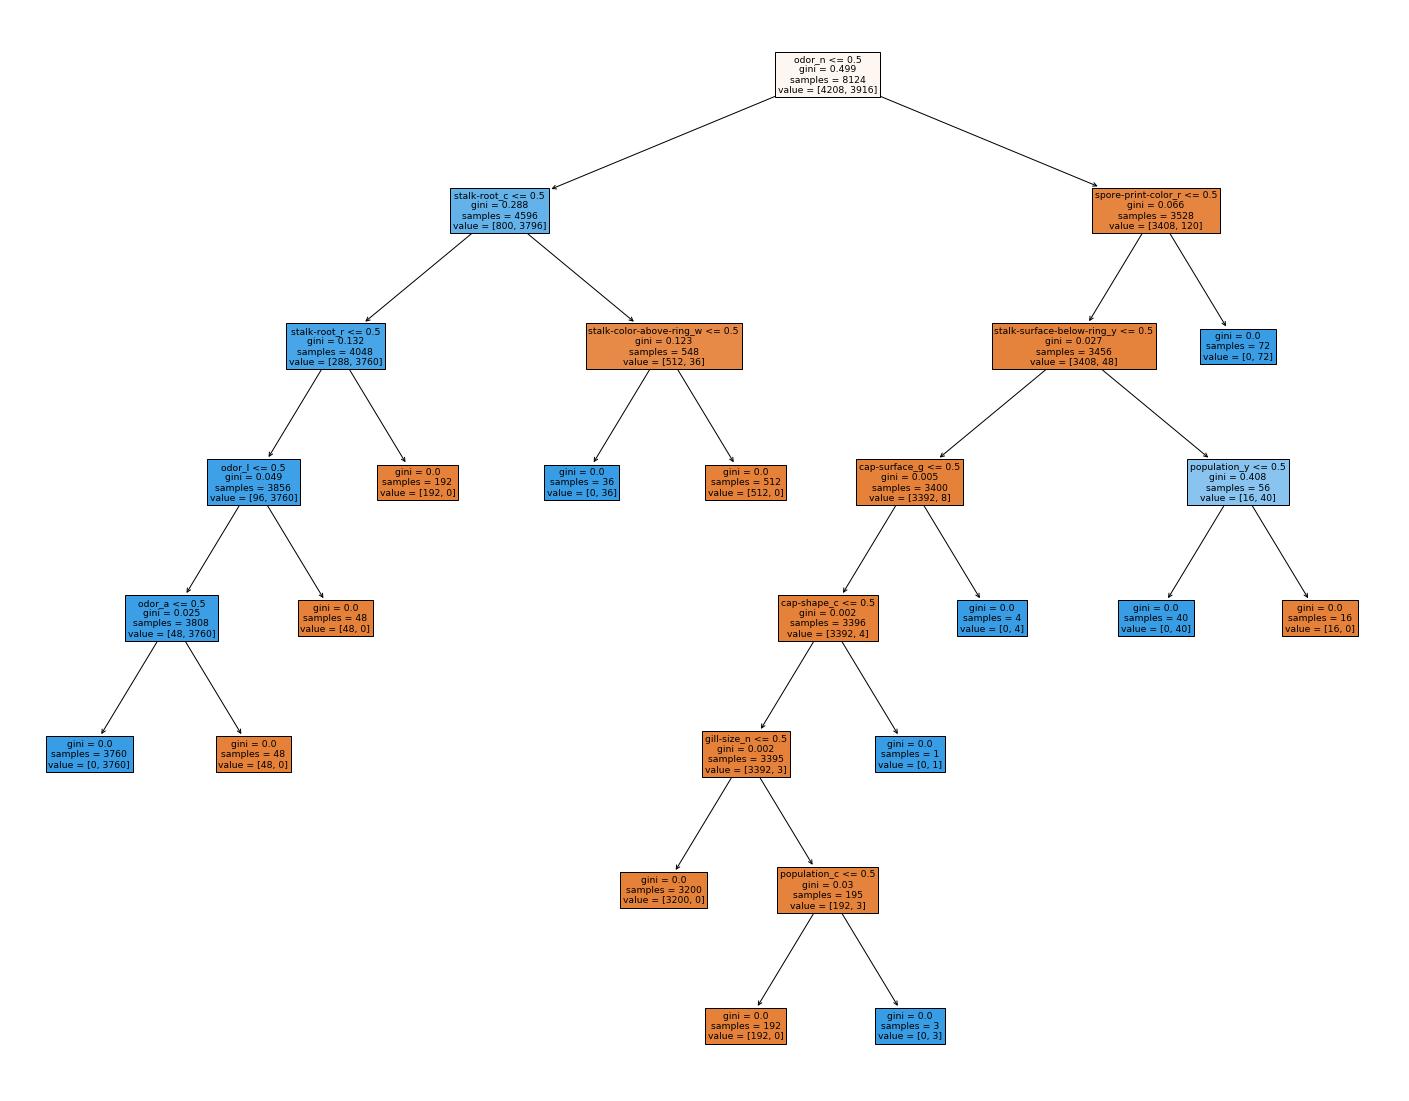

In [31]:
clf = clf.fit(x, df2['class'])
tree.plot_tree(clf)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=x.columns,
                   filled=True)

### barbara, tentei fazer do jeito certo e deu um resultado pior do que do jeito errado 

In [35]:
y = df2['class']
x = df2 != 'class'

C:\Users\Gustavo\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [36]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

modelo2 = ExtraTreesClassifier(n_estimators = 100)
modelo2.fit(x_treino, y_treino)

resultado_teste2 = modelo2.score(x_treino, y_treino)
resultado2 = modelo2.score(x_teste, y_teste)
print(f'Acuracia:{resultado2}, acuracia do teste: {resultado_teste2}')


Acuracia:0.5036915504511895, acuracia do teste: 0.5240942666197679
